# Data-analyse eerste enquête
In dit Jupyter-Notebook zullen de data van de eerste enquête worden opgeschoond, verkent beschreven en tot slot getoetst worden.

In [1]:
# importeert de benodigde bibliotheken
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

In [2]:

# leest het benodigde csv-bestand
enquete = pd.read_csv("C:/Users/Jowgo/Downloads/analyse_groepsproject_ois/enquete1/Enquête TikTok-gebruik studenten – Onderzoek van Interactieve Systemen – Groep A1_December 1, 2023_04.52.csv")

# geeft het eerste vijf obeservaties van het dataframe weer
display(enquete.head(5))

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Vraag 6,Vraag 7,Vraag 8,Vraag 11,Vraag 12,Vraag 13,Vraag 14,Vraag 15,Vraag 16,Vraag 17
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,En hoeveel uur is daarvan besteed aan Instagra...,TikTok kan gebruikt worden voor meerdere doele...,Deze vraag is een open vraag; u mag hierop vri...,Ziet u uzelf over vijf jaar ook nog steeds geb...,Hebt u ooit overwogen met TikTok of te stoppen...,Als u 'ja' hebt geantwoord op de vorige vraag ...,Als u uzelf zou moeten beoordelen op uw produc...,Zou u een productiever leven leiden zonder Tik...,Vink de aspecten aan waarvan u verwacht dat ze...,Formuleer nu een doel dat uw productiviteit op...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID6_TEXT""}","{""ImportId"":""QID7""}","{""ImportId"":""QID8_TEXT""}","{""ImportId"":""QID14""}","{""ImportId"":""QID15""}","{""ImportId"":""QID20""}","{""ImportId"":""QID10_TEXT""}","{""ImportId"":""QID21""}","{""ImportId"":""QID11""}","{""ImportId"":""QID22_TEXT""}"
2,2023-11-22 15:52:07,2023-11-22 15:53:09,IP Address,143.178.232.192,100,61,True,2023-11-22 15:53:10,R_0Mt4AHWWLWwOCsN,NaN,...,NaN,NaN,NaN,Nee,Ja,Ontevreden over het TikTok-aanbod,NaN,Nee,Fysieke en mentale gezondheid,NaN
3,2023-11-23 05:32:02,2023-11-23 05:36:11,IP Address,89.205.136.220,100,249,True,2023-11-23 05:36:12,R_2aPIJJvxMCnkCP8,NaN,...,"2,0,1",Vermaak/Ontspanning,"Goed, het inspireert me om iets van mijn dag t...",Ja,Ja,Verslavingsgevaar,7,Ja,"Studieprestaties,Tijdindeling,Slaapkwaliteit",Mijn doel is om de tijd die ik normaal gesprok...
4,2023-11-23 06:03:29,2023-11-23 06:10:32,IP Address,86.93.199.206,100,423,True,2023-11-23 06:10:33,R_XgOnxA4U4wBU7At,NaN,...,1.5,Vermaak/Ontspanning,Ik denk beide. TikTok kan tuurlijk soms je tij...,Ja,Nee,NaN,7,Nee,"Tijdindeling,Slaapkwaliteit",NaN


# Data opschonen
In dit segment worden de enquêtedata opgeschoond. Denk hierbij aan het verwijderen van overbodige kolommen, niet-afgemaakte waarnemingen en data waarmee nog niet gewerkt kan worden.

In [3]:

# geeft alle kolomnamen weer
print(enquete.columns)

try:
    # slaat de kolomnamen van de overbodige kolommen op in een lijst
    te_verwijderen = [
        'StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
        'RecordedDate', 'ResponseId', 'RecipientFirstName', 'RecipientLastName',
        'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 
        'DistributionChannel', 'UserLanguage'
    ]

    # verwijdert overbodige kolommen
    for kolom in enquete.columns:
        if kolom in te_verwijderen:
            # verwijdert de kolom, als deze overbodige is
            enquete = enquete.drop(te_verwijderen, axis=1)

# voorkomt een lange foutmelding na het verwijderen van de kolom,
# wanneer de code wordt gerund en de kolommen ontbreken
except KeyError:
    pass


Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Vraag 1', 'Vraag 2', 'Vraag 3',
       'Vraag 4', 'Vraag 5', 'Vraag 6', 'Vraag 7', 'Vraag 8', 'Vraag 11',
       'Vraag 12', 'Vraag 13', 'Vraag 14', 'Vraag 15', 'Vraag 16', 'Vraag 17'],
      dtype='object')


In [4]:
# geeft het tot dusver opgeschoonde dataframe weer
display(enquete.head())

,Duration (in seconds),Finished,Vraag 1,Vraag 2,Vraag 3,Vraag 4,Vraag 5,Vraag 6,Vraag 7,Vraag 8,Vraag 11,Vraag 12,Vraag 13,Vraag 14,Vraag 15,Vraag 16,Vraag 17
0,Duration (in seconds),Finished,Hoe oud bent u? Antwoord met een getal.,Wat is uw opleidingsniveau?,Hoeveel uur maakt u dagelijks gebruik van uw s...,"Hoe vaak denkt u aan uw socialemediameldingen?""","Als u kijkt naar uw huidige, dagelijkse social...",En hoeveel uur is daarvan besteed aan Instagra...,TikTok kan gebruikt worden voor meerdere doele...,Deze vraag is een open vraag; u mag hierop vri...,Ziet u uzelf over vijf jaar ook nog steeds geb...,Hebt u ooit overwogen met TikTok of te stoppen...,Als u 'ja' hebt geantwoord op de vorige vraag ...,Als u uzelf zou moeten beoordelen op uw produc...,Zou u een productiever leven leiden zonder Tik...,Vink de aspecten aan waarvan u verwacht dat ze...,Formuleer nu een doel dat uw productiviteit op...
1,"{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""QID1_TEXT""}","{""ImportId"":""QID2""}","{""ImportId"":""QID4_TEXT""}","{""ImportId"":""QID5""}","{""ImportId"":""QID19_TEXT""}","{""ImportId"":""QID6_TEXT""}","{""ImportId"":""QID7""}","{""ImportId"":""QID8_TEXT""}","{""ImportId"":""QID14""}","{""ImportId"":""QID15""}","{""ImportId"":""QID20""}","{""ImportId"":""QID10_TEXT""}","{""ImportId"":""QID21""}","{""ImportId"":""QID11""}","{""ImportId"":""QID22_TEXT""}"
2,61,True,NaN,NaN,NaN,Regelmatig,NaN,NaN,NaN,NaN,Nee,Ja,Ontevreden over het TikTok-aanbod,NaN,Nee,Fysieke en mentale gezondheid,NaN
3,249,True,19,Hbo,5,Regelmatig,8,"2,0,1",Vermaak/Ontspanning,"Goed, het inspireert me om iets van mijn dag t...",Ja,Ja,Verslavingsgevaar,7,Ja,"Studieprestaties,Tijdindeling,Slaapkwaliteit",Mijn doel is om de tijd die ik normaal gesprok...
4,423,True,21,Hbo,NaN,Regelmatig,2,1.5,Vermaak/Ontspanning,Ik denk beide. TikTok kan tuurlijk soms je tij...,Ja,Nee,NaN,7,Nee,"Tijdindeling,Slaapkwaliteit",NaN


In [5]:

# verwijdert de vragen-in-tekst- en ImportId-rij
enquete = enquete.drop([0, 1])

# reset de index na de verwijdering
enquete.reset_index(drop=True, inplace=True)

display(enquete.head())


,Duration (in seconds),Finished,Vraag 1,Vraag 2,Vraag 3,Vraag 4,Vraag 5,Vraag 6,Vraag 7,Vraag 8,Vraag 11,Vraag 12,Vraag 13,Vraag 14,Vraag 15,Vraag 16,Vraag 17
0,61,True,NaN,NaN,NaN,Regelmatig,NaN,NaN,NaN,NaN,Nee,Ja,Ontevreden over het TikTok-aanbod,NaN,Nee,Fysieke en mentale gezondheid,NaN
1,249,True,19,Hbo,5,Regelmatig,8,"2,0,1",Vermaak/Ontspanning,"Goed, het inspireert me om iets van mijn dag t...",Ja,Ja,Verslavingsgevaar,7,Ja,"Studieprestaties,Tijdindeling,Slaapkwaliteit",Mijn doel is om de tijd die ik normaal gesprok...
2,423,True,21,Hbo,NaN,Regelmatig,2,1.5,Vermaak/Ontspanning,Ik denk beide. TikTok kan tuurlijk soms je tij...,Ja,Nee,NaN,7,Nee,"Tijdindeling,Slaapkwaliteit",NaN
3,546,True,20,Wo,5,Vaak,2,"0, 0, 0",Vermaak/Ontspanning,"Goed, het heeft mij een stuk minder productief...",Nee,Ja,Verslavingsgevaar,4,Ja,"Studieprestaties,Tijdindeling,Betrokkenheid bi...",Ik denk dat ik mij beter kan focussen op taken...
4,422,True,18,Hbo,11,Zelden,9,"0,1,1",Vermaak/Ontspanning,"slecht, ik zou mijn tijd beter kunnen besteden",Ja,Ja,Verslavingsgevaar,4,Ja,"Studieprestaties,Tijdindeling,Betrokkenheid bi...","Mijn ICT opdracht af maken, als ik stop met ti..."


In [6]:

# start de telling onafgemaakten
aantal_niet_af = 0

# telt het aantal niet-afgemaakte observaties
for observatie in enquete['Finished']:
    if observatie == 'False':
        aantal_niet_af += 1

# verwijdert alle niet-afgemaakte observaties
enquete = enquete[enquete['Finished'] == 'True']

# geeft het opgeschoonde dataframe weer, en print het aantal verwijderden etc.
display(enquete.head())

print(f"\nHet aantal onvolledige enquêteobservaties is: {aantal_niet_af}.")
print(f"\nHet aantal volledige enquêteobservaties is: {len(enquete['Finished'])}.")


,Duration (in seconds),Finished,Vraag 1,Vraag 2,Vraag 3,Vraag 4,Vraag 5,Vraag 6,Vraag 7,Vraag 8,Vraag 11,Vraag 12,Vraag 13,Vraag 14,Vraag 15,Vraag 16,Vraag 17
0,61,True,NaN,NaN,NaN,Regelmatig,NaN,NaN,NaN,NaN,Nee,Ja,Ontevreden over het TikTok-aanbod,NaN,Nee,Fysieke en mentale gezondheid,NaN
1,249,True,19,Hbo,5,Regelmatig,8,"2,0,1",Vermaak/Ontspanning,"Goed, het inspireert me om iets van mijn dag t...",Ja,Ja,Verslavingsgevaar,7,Ja,"Studieprestaties,Tijdindeling,Slaapkwaliteit",Mijn doel is om de tijd die ik normaal gesprok...
2,423,True,21,Hbo,NaN,Regelmatig,2,1.5,Vermaak/Ontspanning,Ik denk beide. TikTok kan tuurlijk soms je tij...,Ja,Nee,NaN,7,Nee,"Tijdindeling,Slaapkwaliteit",NaN
3,546,True,20,Wo,5,Vaak,2,"0, 0, 0",Vermaak/Ontspanning,"Goed, het heeft mij een stuk minder productief...",Nee,Ja,Verslavingsgevaar,4,Ja,"Studieprestaties,Tijdindeling,Betrokkenheid bi...",Ik denk dat ik mij beter kan focussen op taken...
4,422,True,18,Hbo,11,Zelden,9,"0,1,1",Vermaak/Ontspanning,"slecht, ik zou mijn tijd beter kunnen besteden",Ja,Ja,Verslavingsgevaar,4,Ja,"Studieprestaties,Tijdindeling,Betrokkenheid bi...","Mijn ICT opdracht af maken, als ik stop met ti..."



Het aantal onvolledige enquêteobservaties is: 7.

Het aantal volledige enquêteobservaties is: 30.


In [7]:

nieuwe_kolomnamen = {
    'Vraag 1': 'Leeftijd',
    'Vraag 2': 'Opleidingsniveau',
    'Vraag 3':  'Telefoongebruik dag (uur)',
    'Vraag 4': 'Denken aan meldingen',
    'Vraag 5': 'TikTok-gebruik (uur)',
    'Vraag 6': 'Gebruik alternatieven (uur)',
    'Vraag 7': 'Reden TikTok',
    'Vraag 8': 'Goed of slecht',
    'Vraag 11': 'Over vijf jaar',
    'Vraag 12': 'Wil te stoppen',
    'Vraag 13': 'Gedachteverandering',
    'Vraag 14': 'Productiviteit (0–10)',
    'Vraag 15': 'Zonder TikTok',
    'Vraag 16': 'Verbeteringen z. TikTok',
    'Vraag 17': 'Doel',
}

# geeft de kolommen specifiekere namen
enquete = enquete.rename(columns=nieuwe_kolomnamen)

# geeft het dataframe met nieuwe kolomnamen weer
display(enquete.head())


,Duration (in seconds),Finished,Leeftijd,Opleidingsniveau,Telefoongebruik dag (uur),Denken aan meldingen,TikTok-gebruik (uur),Gebruik alternatieven (uur),Reden TikTok,Goed of slecht,Over vijf jaar,Wil te stoppen,Gedachteverandering,Productiviteit (0–10),Zonder TikTok,Verbeteringen z. TikTok,Doel
0,61,True,NaN,NaN,NaN,Regelmatig,NaN,NaN,NaN,NaN,Nee,Ja,Ontevreden over het TikTok-aanbod,NaN,Nee,Fysieke en mentale gezondheid,NaN
1,249,True,19,Hbo,5,Regelmatig,8,"2,0,1",Vermaak/Ontspanning,"Goed, het inspireert me om iets van mijn dag t...",Ja,Ja,Verslavingsgevaar,7,Ja,"Studieprestaties,Tijdindeling,Slaapkwaliteit",Mijn doel is om de tijd die ik normaal gesprok...
2,423,True,21,Hbo,NaN,Regelmatig,2,1.5,Vermaak/Ontspanning,Ik denk beide. TikTok kan tuurlijk soms je tij...,Ja,Nee,NaN,7,Nee,"Tijdindeling,Slaapkwaliteit",NaN
3,546,True,20,Wo,5,Vaak,2,"0, 0, 0",Vermaak/Ontspanning,"Goed, het heeft mij een stuk minder productief...",Nee,Ja,Verslavingsgevaar,4,Ja,"Studieprestaties,Tijdindeling,Betrokkenheid bi...",Ik denk dat ik mij beter kan focussen op taken...
4,422,True,18,Hbo,11,Zelden,9,"0,1,1",Vermaak/Ontspanning,"slecht, ik zou mijn tijd beter kunnen besteden",Ja,Ja,Verslavingsgevaar,4,Ja,"Studieprestaties,Tijdindeling,Betrokkenheid bi...","Mijn ICT opdracht af maken, als ik stop met ti..."


# Oriëntatie data
In dit segment worden er georiënteerd op de data van de enquête. Denk hierbij aan gemiddeldes, modi, medianen en percentages.

In [8]:

# creëert kolomen voor de beschrijvende waarden
columns = ['Leeftijd', 'Telefoongebruik dag (uur)', 'TIKTOK-GEBRUIK (UUR)', 'PRODUCTIVITEIT (0–10)']
minimums = [18.0, 2.0, 0.3, 3.0]
maximums = [24.0, 11.0, 9.0, 10.0]
means = [20.18, 5.99, 2.26, 6.38]
medians = [20.0, 5.0, 1.0, 7.0]
modes = [20.0, 5.0, 1.0, 7.0]
std_deviations = [1.442, 2.332, 2.258, 1.614]

# Creating a DataFrame with the descriptive statistics
statistics_data = {
    'Column': columns,
    'Minimum': minimums,
    'Maximum': maximums,
    'Mean': means,
    'Median': medians,
    'Mode': modes,
    'Standard Deviation': std_deviations
}

statistics_df = pd.DataFrame(statistics_data)

# Set 'Column' as index for better presentation
statistics_df.set_index('Column', inplace=True)

display(statistics_df)


,Minimum,Maximum,Mean,Median,Mode,Standard Deviation
Column,,,,,,
Leeftijd,18.0,24.0,20.18,20.0,20.0,1.442
Telefoongebruik dag (uur),2.0,11.0,5.99,5.0,5.0,2.332
TIKTOK-GEBRUIK (UUR),0.3,9.0,2.26,1.0,1.0,2.258
PRODUCTIVITEIT (0–10),3.0,10.0,6.38,7.0,7.0,1.614


## Beschrijvende waarden

In [9]:

# slaat de namen van de kolommen die geen losse getallen bevatten
kolommen_geen_getal = [
    'Opleidingsniveau', 'Denken aan meldingen', 'Reden TikTok', 'Over vijf jaar',
    'Wil te stoppen', 'Gedachteverandering', 'Zonder TikTok'
]

for kolom in kolommen_geen_getal:
    # berekent de beschrijvende data van de iedere kolom
    modus_kolom = enquete[kolom].mode()[0]
    frequentie_moduswaarde = sum(enquete[kolom] == modus_kolom)

    percentage_modus = (frequentie_moduswaarde / len(enquete[kolom])) * 100
    
    # print de opmaakt van het waardensegment
    print(str(kolom).upper())
    print('-' * 65)
    
    # print de beschrijvende data voor iedere kolom
    print(f"- De modus van de kolom is: {modus_kolom};")
    print(f"- Deze waarde maakt zo'n '{percentage_modus:.1f}%' van het totale aantal uit.")
    
    # start de lijst die dubbele antwoorden vermijdt
    waarde_al_gezien = []
    
    # berekent het percentage van alle andere enqueteantwoorden
    for waarde in enquete[kolom]:
        # slaat de moduswaarde over
        if kolom == modus_kolom:
            pass
        
        # slaat de waarde over, als de waarde al een berekent percentage heeft
        elif waarde in waarde_al_gezien:
            pass
        
        else:
            # voegt de unieke waarde toe aan een lijst
            waarde_al_gezien.append(waarde)
            
            # berekent het percentage van de waarde in de kolom
            percentage_waarde = (sum(enquete[kolom] == waarde) / len(enquete[kolom])) * 100

            # print het resultaat
            print(f"    - De waarde '{waarde}' maakt '{percentage_waarde:.1f}%' van het totale aantal uit.")
    
    # print een witregel voor het volgende kolomblok
    print('\n')


OPLEIDINGSNIVEAU
-----------------------------------------------------------------
- De modus van de kolom is: Wo;
- Deze waarde maakt zo'n '53.3%' van het totale aantal uit.
    - De waarde 'nan' maakt '0.0%' van het totale aantal uit.
    - De waarde 'Hbo' maakt '30.0%' van het totale aantal uit.
    - De waarde 'Wo' maakt '53.3%' van het totale aantal uit.
    - De waarde 'Mbo' maakt '10.0%' van het totale aantal uit.


DENKEN AAN MELDINGEN
-----------------------------------------------------------------
- De modus van de kolom is: Regelmatig;
- Deze waarde maakt zo'n '40.0%' van het totale aantal uit.
    - De waarde 'Regelmatig' maakt '40.0%' van het totale aantal uit.
    - De waarde 'Vaak' maakt '16.7%' van het totale aantal uit.
    - De waarde 'Zelden' maakt '33.3%' van het totale aantal uit.
    - De waarde 'Zeer vaak' maakt '3.3%' van het totale aantal uit.
    - De waarde 'Nooit' maakt '3.3%' van het totale aantal uit.
    - De waarde 'nan' maakt '0.0%' van het totale aant

## Foute invoer gecorrigeerd
In dit segment worden de data van vraag 6: "En hoeveel uur is daarvan besteed aan Instagram-reels, YouTube-shorts en Snapchat-spotlights? Antwoord als volgt: Instagram, YouTube, Snapchat. Dus: 4, 2, 0." handmatig geselecteerd, omdat deze te vaak niet volgens het voorschrift zijn ingevuld.

In [19]:

# niet in de vorm: Instagram, Youtube, Snapchat
tijd_gebruik_alternatieven = {
    'Instagram-reels': [2, 1.5, 0, 0, 1, 1, 0.5, 0, 2, 0, 1, 0, 1, 0, 0.457, 1, 0, 3, 0.5, 0, 1, 0.3, 1, 7, 2, 1, 14, 1],
    'Youtube-shorts': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0.43, 1, 0, 0, 0.5, 0, 0, 0, 3, 0, 0, 0, 0, 0],
    'Snapchat-spotlight': [1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0.5, 0, 0, 0.5, 0, 0, 1, 0, 0, 0, 0, 0, 0]
}


# berekent de gemiddelde tijd besteed aan de media
for medium in tijd_gebruik_alternatieven:
    # berekent de gemiddelde duur
    totale_duur = sum(tijd_gebruik_alternatieven[medium])
    totale_frequentie = len(tijd_gebruik_alternatieven[medium])
    gemiddelde_tijd = totale_duur / totale_frequentie
    
    # print het resultaat
    print(f"De gemiddelde tijd besteed aan '{medium}' is: {gemiddelde_tijd:.2f} uur.")
  

De gemiddelde tijd besteed aan 'Instagram-reels' is: 1.51 uur.
De gemiddelde tijd besteed aan 'Youtube-shorts' is: 0.25 uur.
De gemiddelde tijd besteed aan 'Snapchat-spotlight' is: 0.32 uur.


Deze waarden zouden eigenlijk individueel nagelopen moeten worden, maar dit is een binaire representatie van de antwoorden — zonder enige nuance dus.

In [20]:

# slaat de juiste kolom op in een variabele
tiktok_goed_slecht = enquete['Goed of slecht']

# start de tellingen van de binaire variabelen
goed = 0
slecht = 0

# gaat de antwoorden af — op zoek naar sleutelwoorden
for antwoord in tiktok_goed_slecht:
    if 'goed' in str(antwoord):
        goed += 1
    # als het woord 'slecht' in het antwoord zit
    else:
        slecht += 1
        
# berekent de percentages van de binaire versie van de antwoorden       
percentage_goed = (goed / len(tiktok_goed_slecht)) * 100
percentage_slecht = (slecht / len(tiktok_goed_slecht)) * 100
        
print(f"Het percentage deelnemers dat heeft aangegeven dat TikTok een 'goed' effect op hun dagelijks leven heeft, is: '{percentage_goed:.1f}%'.") 
print(f"Het percentage deelnemers dat heeft aangegeven dat TikTok een 'slecht' effect op hun dagelijks leven heeft, is: '{percentage_slecht:.1f}%'.") 


Het percentage deelnemers dat heeft aangegeven dat TikTok een 'goed' effect op hun dagelijks leven heeft, is: '26.9%'.
Het percentage deelnemers dat heeft aangegeven dat TikTok een 'slecht' effect op hun dagelijks leven heeft, is: '73.1%'.


# Toetsen en correlaties
In dit segment worden de enquêtedata getoetst en wordt gezocht naar correlaties tussen hun variabelen.

In [21]:

# verwijdert de onbeschikbare data
enquete.dropna(subset=['Wil te stoppen', 'TikTok-gebruik (uur)', 'Telefoongebruik dag (uur)'], inplace=True)


In [30]:

# zet de kolomwaarden om naar integers
enquete['TikTok-gebruik (uur)'] = pd.to_numeric(enquete['TikTok-gebruik (uur)'], errors='coerce')
enquete['Telefoongebruik dag (uur)'] = pd.to_numeric(enquete['Telefoongebruik dag (uur)'], errors='coerce')
enquete['Leeftijd'] = pd.to_numeric(enquete['Leeftijd'], errors='coerce')

# definieert de toetsgroepen, en berekent de relatie
t_waarde, p_waarde = ttest_ind(enquete['Telefoongebruik dag (uur)'].dropna(), enquete['TikTok-gebruik (uur)'].dropna(), equal_var=False)

# print de resultaten
print("TELEFOONGEBRUIK DAG (UUR) & TIKTOK-GEBRUIK (UUR)")
print(f"De t-waarde: {t_waarde:.3f}.")
print(f"De p-waarde: {p_waarde:.3f}.")


TELEFOONGEBRUIK DAG (UUR) & TIKTOK-GEBRUIK (UUR)
De t-waarde: 5.058.
De p-waarde: 0.000.


In [31]:

# definieert de toetsgroepen, en berekent de relatie
pearson_correlatie = enquete['Leeftijd'].corr(enquete['TikTok-gebruik (uur)'])

# print het resultaat
print("TELEFOONGEBRUIK DAG (UUR) & LEEFTIJD")
print(f"De Pearson-correlationcoëfficiënt: {pearson_correlatie:.3f}.")


TELEFOONGEBRUIK DAG (UUR) & LEEFTIJD
De Pearson-correlationcoëfficiënt: -0.368.


In [32]:

# definieert de toetsgroepen, en berekent de relatie
spearman_correlatie = enquete['Opleidingsniveau'].rank().corr(enquete['Reden TikTok'].rank(), method='spearman')

# print het resultaat
print("OPLEIDINGSNIVEAU & REDEN TIKTOK")
print(f"De Spearman-correlationcoëfficiënt: {spearman_correlatie:.3f}.")


OPLEIDINGSNIVEAU & REDEN TIKTOK
De Spearman-correlationcoëfficiënt: 0.260.


In [33]:

# definieert de toetsgroepen, en berekent de relatie
spearman_correlatie = enquete['Productiviteit (0–10)'].rank().corr(enquete['TikTok-gebruik (uur)'].rank(), method='spearman')

# print het resultaat
print("TIKTOK-GEBRUIK UUR & PRODUCTIVITEIT (0–10)")
print(f"De Spearman-correlationcoëfficiënt: {spearman_correlatie:.3f}.")

TIKTOK-GEBRUIK UUR & PRODUCTIVITEIT (0–10)
De Spearman-correlationcoëfficiënt: -0.280.


C:\Users\Jowgo\AppData\Local\Temp\ipykernel_15552\3069635423.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


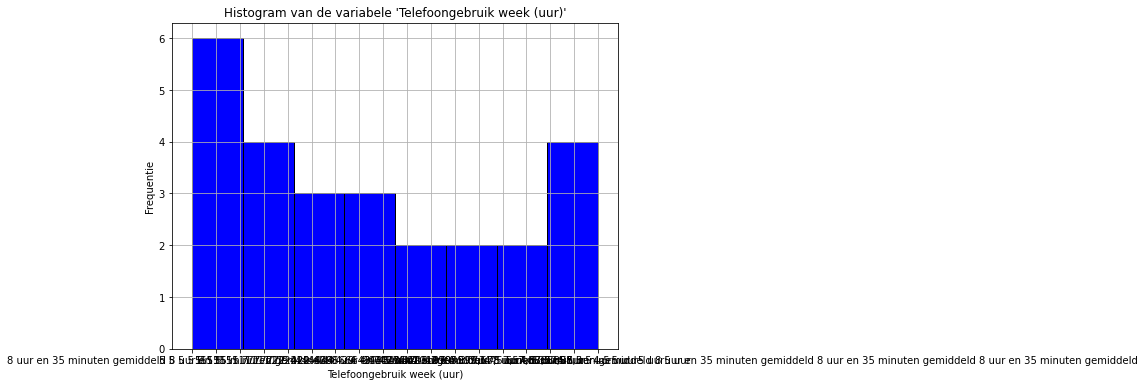

In [17]:
enquete['Telefoongebruik week (uur)'] = enquete['Telefoongebruik dag (uur)'] * 7

# Create a histogram for 'Telefoongebruik dag (uur)'
plt.figure(figsize=(8, 6))
plt.hist(enquete['Telefoongebruik week (uur)'], bins=8, color='blue', edgecolor='black')

plt.xlabel('Telefoongebruik week (uur)')
plt.ylabel('Frequentie')
plt.title("Histogram van de variabele 'Telefoongebruik week (uur)'")

plt.grid(True)
plt.tight_layout()

plt.show()


In [ ]:
len(enquete['Productiviteit (0–10)'])